In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
print("First few rows:\n", df.head())

First few rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
df['Age_forward_fill'] = df['Age'].fillna(method='ffill')
df['Age_backward_fill'] = df['Age'].fillna(method='bfill')
print(df.isna().sum())

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2
Age_forward_fill       0
Age_backward_fill      0
dtype: int64


C:\Users\archa\AppData\Local\Temp\ipykernel_13096\760490619.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age_forward_fill'] = df['Age'].fillna(method='ffill')
C:\Users\archa\AppData\Local\Temp\ipykernel_13096\760490619.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age_backward_fill'] = df['Age'].fillna(method='bfill')


In [6]:
df['Cabin'] = df['Cabin'].fillna('unknown', limit=5)
print(df.isna().sum())

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                682
Embarked               2
Age_forward_fill       0
Age_backward_fill      0
dtype: int64


In [7]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\nDuplicates removed: {before - after}")


Duplicates removed: 0


In [8]:
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
print(df[['Sex','Sex_encoded']].head())


      Sex  Sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


In [9]:
scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])
print(df[['Fare','Fare_scaled']].head())

      Fare  Fare_scaled
0   7.2500    -0.502445
1  71.2833     0.786845
2   7.9250    -0.488854
3  53.1000     0.420730
4   8.0500    -0.486337


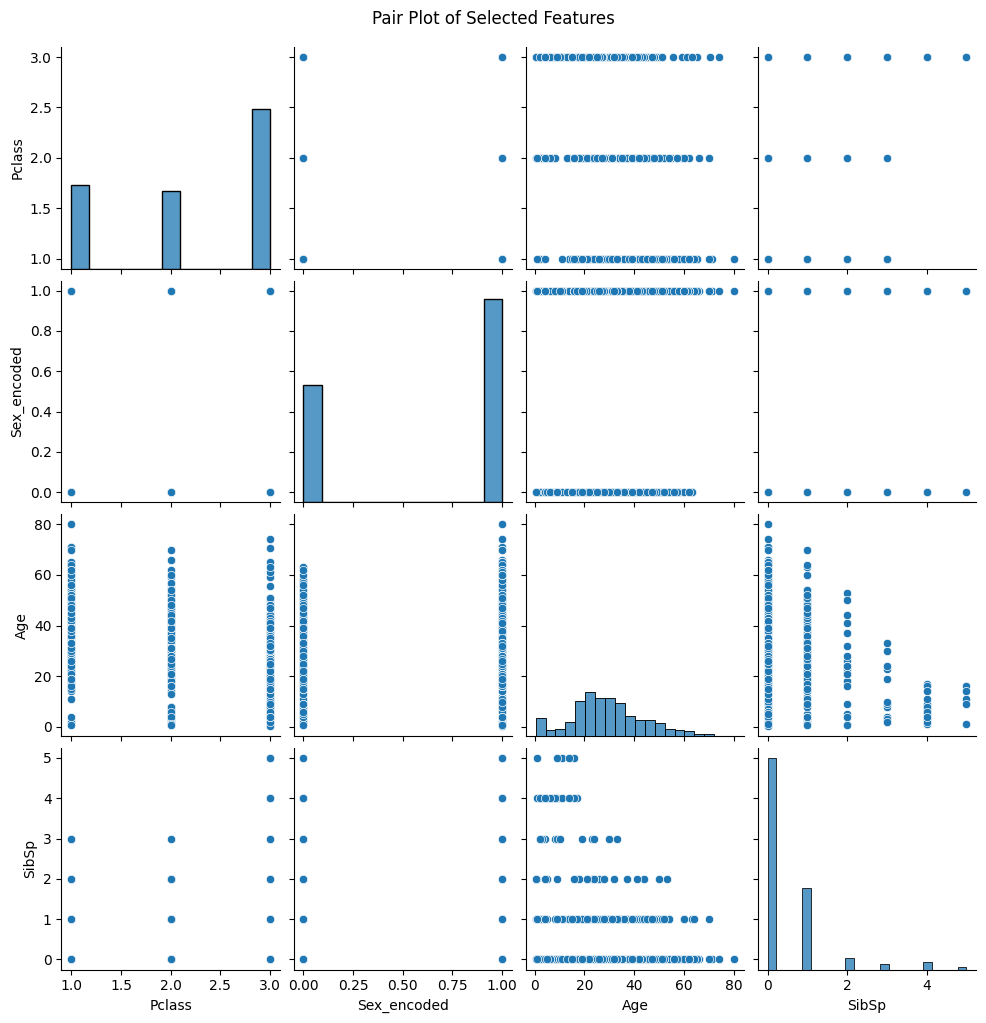

In [10]:
pairplot_cols = ['Pclass', 'Sex_encoded', 'Age', 'SibSp']
sns.pairplot(df[pairplot_cols].dropna())
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

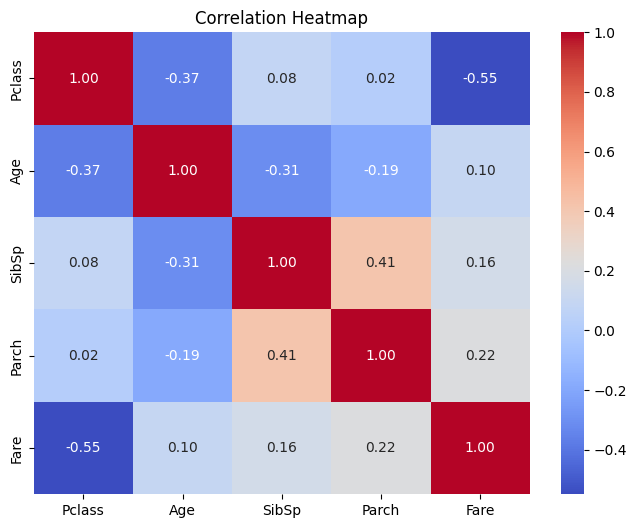

In [11]:
corr_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()